# Another Titanic Data Analysis
*The Start of my Kaggle Machine Learning Journey*

![](https://s26162.pcdn.co/wp-content/uploads/sites/3/2021/02/titanic-feat1.jpg)

As is the case with many beginning to learn about Machine Learning,the Titanic dataset has become a staple for beginners getting started. While I have been exposed to this dataset many times, I haven't spent time with trying to put together a formal analysis and enter the Kaggle-verse. So here's to new beginnings and starting my Kaggle machine learning journey with this dataset.

# Some background

The story of the Titanic is one of tragedy. 

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In the challenge the following question is asked: **“what sorts of people were more likely to survive?”**

The following notebook attempts to explore answering this question and develop a model which can predict passenger survival. 

With this in mind, lets get into it!

# Some Questions

Before getting into modelling passenger survival, lets first explore the data by seeking to ask some of the following questions.

## (One-way interactions)

1. What proportion of male passengers who survived? What is the proportion of female passengers who survived?

2. Is there a relationship between ticket class and survival?

3. Is there a relationship between age and survival?

4. Is there a relationship between number of siblings / spouses aboard the Titanic and survival?

5. Is there a relationship between the number of parents / children aboard the Titanic and survival?

## (Two-way interactions) 

1. Is there an observable two-way interaction effect between passenger sex, ticket class and survival?

2. Is there a observable two-way interaction effect between passenger sex, age and survival?

3. Is there a observable two-way interaction effect between passenger sex, number of siblings / spouses aboard the Titanic and survival?

4. Is there a observable two-way interaction effect between passenger sex, number of parents / children aboard the Titanic and survival?

5. Is there a observable two-way interaction effect between passenger ticket class, age and survival?

6. Is there a observable two-way interaction effect between passenger ticket class, number of siblings / spouses aboard the Titanic and survival?

7. Is there a observable two-way interaction effect between passenger ticket class, number of parents / children aboard the Titanic and survival?

8. Is there a observable two-way interaction effect between passenger age, number of siblings / spouses aboard the Titanic and survival?

9. Is there a observable two-way interaction effect between passenger age, number of parents / children aboard the Titanic and survival?

**While it is possible to explore higher dimension interactions, since it becomes more challenging to visualize and interpret, only one and two way interactions will be considered.**

# Missing data.

Before getting into exploring these questions, I like to check for missing data. While there may not be any treatment applied to the missing data, awareness of it is important for making inference. To check for missing data the the `missingno` module can help visualize the missing data. For exact proportions, some manipulation with `pandas` will be implemented. (For more info on the `missingno` module, check out [this article on Medium](https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009#:~:text=The%20missingno%20Library,%2C%20heatmap%2C%20or%20a%20dendrogram.)) 

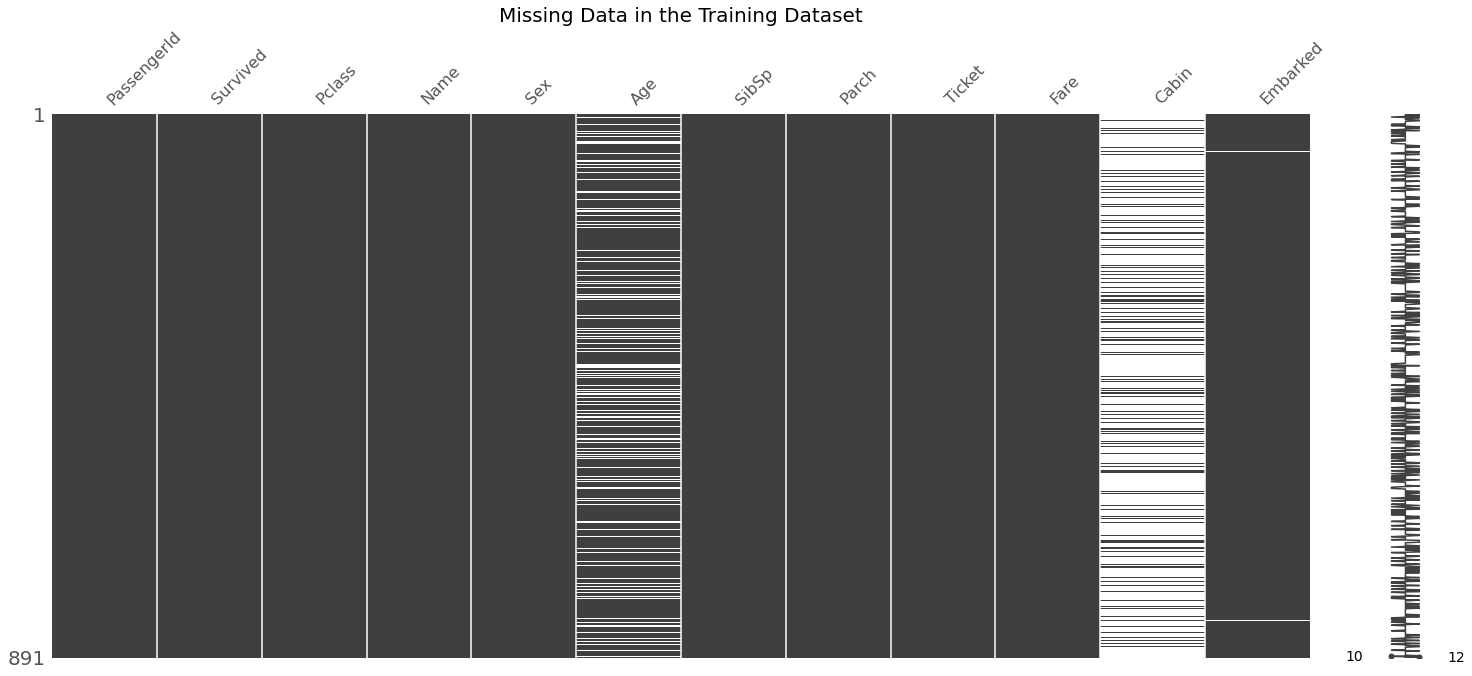

,% Missing
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
# Will be working with the training dataset exclusively

dt= pd.read_csv("../input/titanic/train.csv")

msno.matrix(dt)
plt.title("Missing Data in the Training Dataset", fontsize=20)
plt.show()

pd.DataFrame({"% Missing":dt.isnull().sum()*100/len(dt)})


In the training dataset, data is missing in the `Age`, `Cabin` and `Embarked` columns. Since `Cabin` and `Embarked` are not relevant to the analysis the missing data present in `Age` is only of concern. **As of now, no imputation will be applied to the missing data. As such, the data will be worked with "as is".** It could be that I will explore missing data imputation, but as of now, it will not be considered. 

# Exploratory Data Analysis (EDA)

With missing data acknowledged, the data can now be explored. The EDA will seek to answer the above questions.

# One-way interactions

## 1. Passenger sex and survival

A more direct way of applying inference would be to relate to using proportion. From the visual below, we note that over 81% of males perished on the Titanic while only around 25.8% of females did. 74.2% of females survived on the Titanic while only 18.89% of males survived. This confirms [Wikipedia's claim](https://en.wikipedia.org/wiki/Titanic) stating "*A disproportionate number of men were left aboard because of a "women and children first" protocol for loading lifeboats.*"

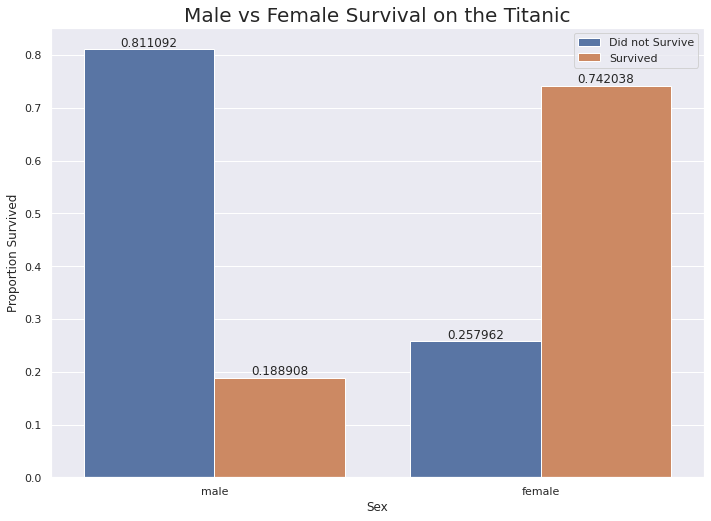

In [2]:
# Data wrangling to get visuals 

mSurvivedDf = dt.groupby(['Survived','Sex'])\
                   .count()\
                   .reset_index()[['Survived','Sex','PassengerId']][dt.groupby(['Survived','Sex'])\
                   .count()\
                   .reset_index()['Sex']=="male"]

fSurvivedDf = dt.groupby(['Survived','Sex'])\
                   .count()\
                   .reset_index()[['Survived','Sex','PassengerId']][dt.groupby(['Survived','Sex'])\
                   .count()\
                   .reset_index()['Sex']=="female"]
mSurvivedDf["Proportion Survived"] = mSurvivedDf["PassengerId"].apply(lambda x: x/sum( mSurvivedDf["PassengerId"]))
fSurvivedDf["Proportion Survived"] = fSurvivedDf["PassengerId"].apply(lambda x: x/sum( fSurvivedDf["PassengerId"]))


#  Code for the visual
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.barplot(x = "Sex",
            y = "Proportion Survived",
            hue = "Survived",
            data= mSurvivedDf.append(fSurvivedDf)
           )
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Did not Survive','Survived'], bbox_to_anchor=(1,1))
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Male vs Female Survival on the Titanic", fontsize=20)
plt.show()


## 2. Ticket Class and Survival

On the Titanic, you really got what you paid for when it comes to ticket class. A passenger in first class had the best chance of survival with 62.9% of first passengers surviving, followed by second class which had 47.3% of its passengers surviving. Third class had it really rough with only 24.2% of passengers having survived. 

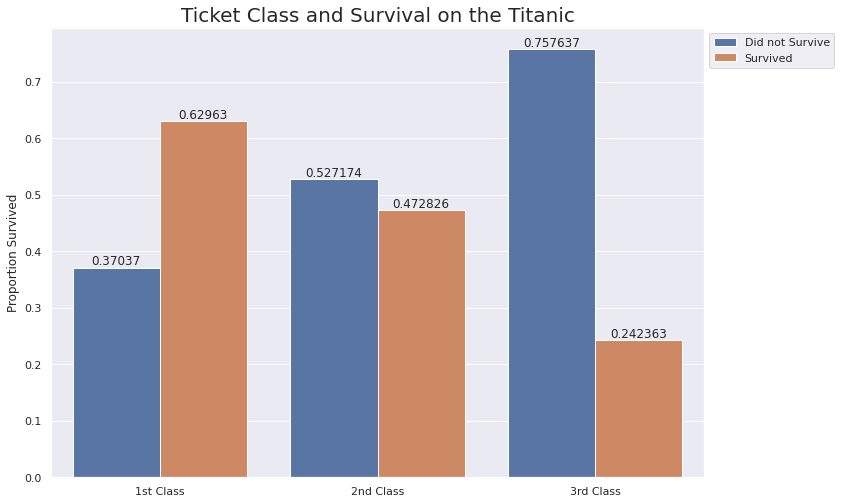

In [3]:
firstClassSurvivedDf = dt.groupby(['Survived','Pclass'])\
                   .count()\
                   .reset_index()[['Survived','Pclass','PassengerId']][dt.groupby(['Survived','Pclass'])\
                   .count()\
                   .reset_index()['Pclass']==1]

secondClassSurvivedDf = dt.groupby(['Survived','Pclass'])\
                   .count()\
                   .reset_index()[['Survived','Pclass','PassengerId']][dt.groupby(['Survived','Pclass'])\
                   .count()\
                   .reset_index()['Pclass']==2]


thirdClassSurvivedDf = dt.groupby(['Survived','Pclass'])\
                   .count()\
                   .reset_index()[['Survived','Pclass','PassengerId']][dt.groupby(['Survived','Pclass'])\
                   .count()\
                   .reset_index()['Pclass']==3]

firstClassSurvivedDf["Proportion Survived"] = firstClassSurvivedDf["PassengerId"].apply(lambda x: x/sum( firstClassSurvivedDf["PassengerId"]))

secondClassSurvivedDf["Proportion Survived"] = secondClassSurvivedDf["PassengerId"].apply(lambda x: x/sum( secondClassSurvivedDf["PassengerId"]))

thirdClassSurvivedDf["Proportion Survived"] = thirdClassSurvivedDf["PassengerId"].apply(lambda x: x/sum( thirdClassSurvivedDf["PassengerId"]))




ax = sns.barplot(x = "Pclass",
            y = "Proportion Survived",
            hue = "Survived",
            data= firstClassSurvivedDf.append(secondClassSurvivedDf.append(thirdClassSurvivedDf))
           )
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Did not Survive','Survived'], bbox_to_anchor=(1,1))
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set(xticklabels=["1st Class","2nd Class", "3rd Class"], xlabel=None)
plt.title("Ticket Class and Survival on the Titanic", fontsize=20)
plt.show()


## 3. Distribution of age and survival

Upon visual inspection, age distribution of passengers whom surivived vs passengers who did not is similar besides for a few differences. The mean age of survivors is slightly younger than those who perished. This can be accedited to the a larger portion of passengers under 5 which were survived. In terms of median, the ages in the survived and perished groups are the same (28).

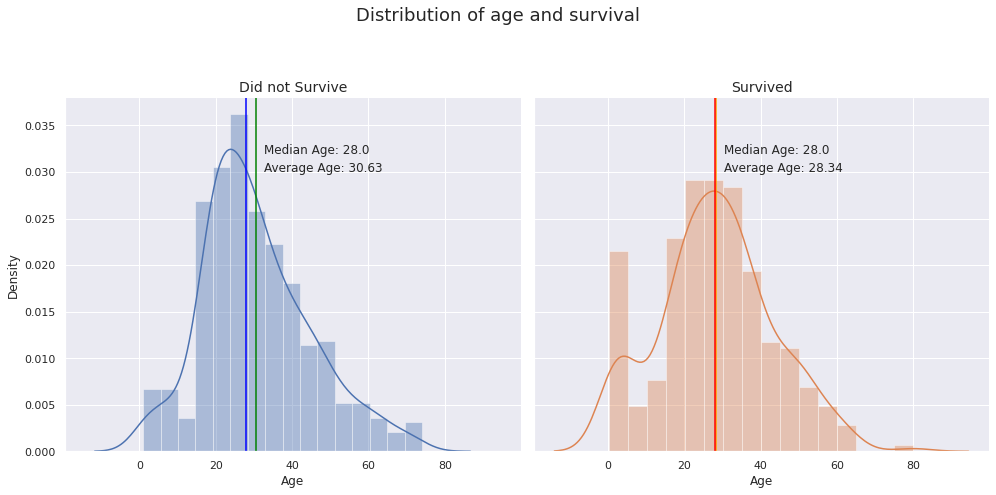

In [4]:
%%capture --no-display
# mute warnings^
ax = sns.FacetGrid(dt, col='Survived',hue="Survived", height=7)

ax.map(sns.distplot, 'Age')
ax1, ax2 = ax.axes[0]
ax1.axvline(x=dt[dt["Survived"]==0].Age.mean(),
            color='green')
ax2.axvline(x=dt[dt["Survived"]==1].Age.mean(),
            color='orange')
ax1.axvline(x=dt[dt["Survived"]==0].Age.median(),
            color='blue')
ax2.axvline(x=dt[dt["Survived"]==1].Age.median(),
            color='red')
ax1.text(dt[dt["Survived"]==0].Age.mean()+2,0.03, "Average Age: "+ str(round(dt[dt["Survived"]==0].Age.mean(),2)))
ax2.text(dt[dt["Survived"]==1].Age.mean()+2,0.03, "Average Age: "+ str(round(dt[dt["Survived"]==1].Age.mean(),2)))
ax1.text(dt[dt["Survived"]==0].Age.mean()+2,0.032, "Median Age: "+ str(round(dt[dt["Survived"]==0].Age.median(),2)))
ax2.text(dt[dt["Survived"]==1].Age.mean()+2,0.032, "Median Age: "+ str(round(dt[dt["Survived"]==1].Age.median(),2)))
ax1.set_title("Did not Survive",size=14)
ax2.set_title("Survived",size=14)
ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle("Distribution of age and survival",size=18)
plt.show()

## 4. Number of Siblings/Spouse aboard and Survival

Since the number of passengers which came with more than one person became fewer in number, anyone who came with more than 2 relatives were grouped together. As such there are there groups: (1) those who came alone, (2) those who came with a "plus one" and (3) those who came with 2 or more relatives. From the visual below, its clear that those who came accompanied with a "plus one" had the best probability of survival than those who came alone or who came with two or relatives. 

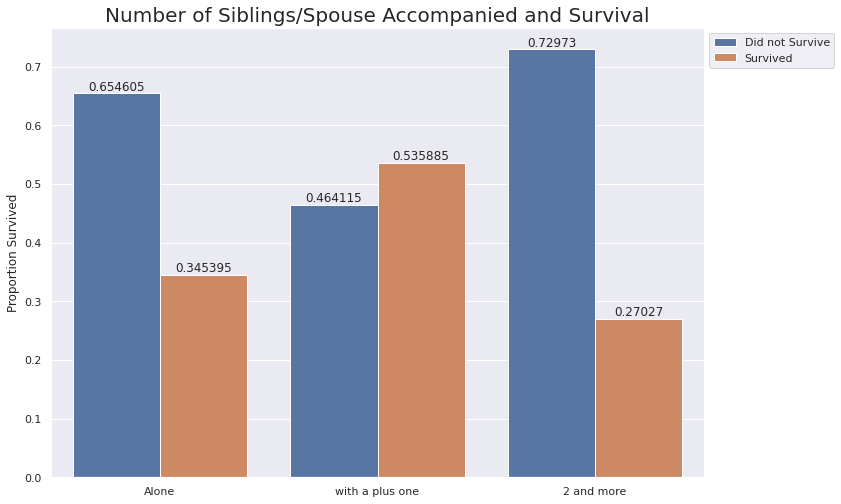

In [5]:
# Data wrangling

SibSp_Class = []

for passenger_sibsp in dt["SibSp"]:
    if passenger_sibsp == 0:
        SibSp_Class.append("Alone")
    if passenger_sibsp == 1:
        SibSp_Class.append("with a plus one")
    if passenger_sibsp > 1:
        SibSp_Class.append("2 and more")

dt["SibSp_Class"]=SibSp_Class

aloneSurvivedDf = dt.groupby(['Survived','SibSp_Class'])\
                   .count()\
                   .reset_index()[['Survived','SibSp_Class','PassengerId']][dt.groupby(['Survived','SibSp_Class'])\
                   .count()\
                   .reset_index()['SibSp_Class']=="Alone"]

plus1SurvivedDf = dt.groupby(['Survived','SibSp_Class'])\
                   .count()\
                   .reset_index()[['Survived','SibSp_Class','PassengerId']][dt.groupby(['Survived','SibSp_Class'])\
                   .count()\
                   .reset_index()['SibSp_Class']=="with a plus one"]


twoplusSurvivedDf = dt.groupby(['Survived','SibSp_Class'])\
                   .count()\
                   .reset_index()[['Survived','SibSp_Class','PassengerId']][dt.groupby(['Survived','SibSp_Class'])\
                   .count()\
                   .reset_index()['SibSp_Class']=="2 and more"]

aloneSurvivedDf["Proportion Survived"] = aloneSurvivedDf["PassengerId"].apply(lambda x: x/sum( aloneSurvivedDf["PassengerId"]))

plus1SurvivedDf["Proportion Survived"] = plus1SurvivedDf["PassengerId"].apply(lambda x: x/sum( plus1SurvivedDf["PassengerId"]))

twoplusSurvivedDf["Proportion Survived"] = twoplusSurvivedDf["PassengerId"].apply(lambda x: x/sum( twoplusSurvivedDf["PassengerId"]))



ax = sns.barplot(x = "SibSp_Class",
            y = "Proportion Survived",
            hue = "Survived",
            data= aloneSurvivedDf.append(plus1SurvivedDf.append(twoplusSurvivedDf))
           )
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Did not Survive','Survived'], bbox_to_anchor=(1,1))
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set(xlabel=None)
plt.title("Number of Siblings/Spouse Accompanied and Survival", fontsize=20)
plt.show()

## 5. Parent/Children accompanyment and Survival

As in the case of siblings/spouse a similar sort of classification is applied in this exploratory step with number of parents/children accompanying a given passenger being grouped into: (1) those who came without a parent or child, (2) those who came with one child/parent and (3) those who came with two or more parents/children. As was the case with number of siblings/spouses aboard the Titanic for a given passenger. Those who had a single parent/child accompanying them had the best probability of survival, followed by those who came with 2 or more parents or children. Those who travelled solo had the lowest probability of survival.

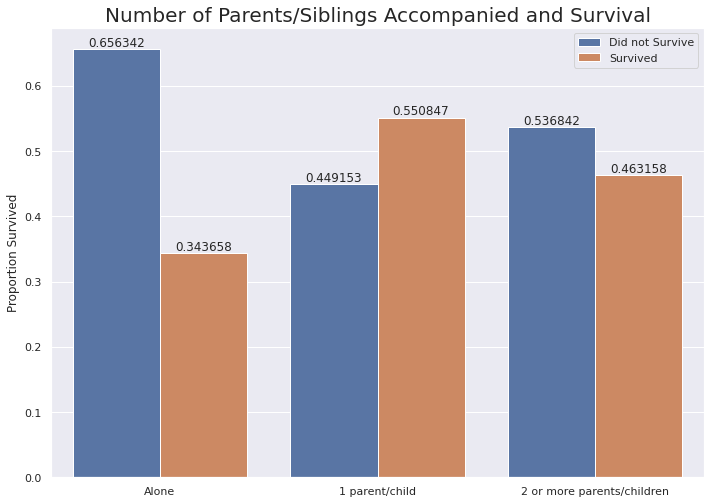

In [6]:
Parch_Class = []

for passenger_sibsp in dt["Parch"]:
    if passenger_sibsp == 0:
        Parch_Class.append("Alone")
    if passenger_sibsp == 1:
        Parch_Class.append("1 parent/child")
    if passenger_sibsp > 1:
        Parch_Class.append("2 or more parents/children")

dt["Parch_Class"]=Parch_Class

aloneSurvivedDf = dt.groupby(['Survived','Parch_Class'])\
                   .count()\
                   .reset_index()[['Survived','Parch_Class','PassengerId']][dt.groupby(['Survived','Parch_Class'])\
                   .count()\
                   .reset_index()['Parch_Class']=="Alone"]

plus1SurvivedDf = dt.groupby(['Survived','Parch_Class'])\
                   .count()\
                   .reset_index()[['Survived','Parch_Class','PassengerId']][dt.groupby(['Survived','Parch_Class'])\
                   .count()\
                   .reset_index()['Parch_Class']=="1 parent/child"]


twoplusSurvivedDf = dt.groupby(['Survived','Parch_Class'])\
                   .count()\
                   .reset_index()[['Survived','Parch_Class','PassengerId']][dt.groupby(['Survived','Parch_Class'])\
                   .count()\
                   .reset_index()['Parch_Class']=="2 or more parents/children"]

aloneSurvivedDf["Proportion Survived"] = aloneSurvivedDf["PassengerId"].apply(lambda x: x/sum( aloneSurvivedDf["PassengerId"]))

plus1SurvivedDf["Proportion Survived"] = plus1SurvivedDf["PassengerId"].apply(lambda x: x/sum( plus1SurvivedDf["PassengerId"]))

twoplusSurvivedDf["Proportion Survived"] = twoplusSurvivedDf["PassengerId"].apply(lambda x: x/sum( twoplusSurvivedDf["PassengerId"]))


ax = sns.barplot(x = "Parch_Class",
            y = "Proportion Survived",
            hue = "Survived",
            data= aloneSurvivedDf.append(plus1SurvivedDf.append(twoplusSurvivedDf))
           )
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Did not Survive','Survived'], bbox_to_anchor=(1,1))
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set(xlabel=None)
plt.title("Number of Parents/Siblings Accompanied and Survival", fontsize=20)
plt.show()

# Two-way Interactions

## 1. Sex, Ticket Class and Survival

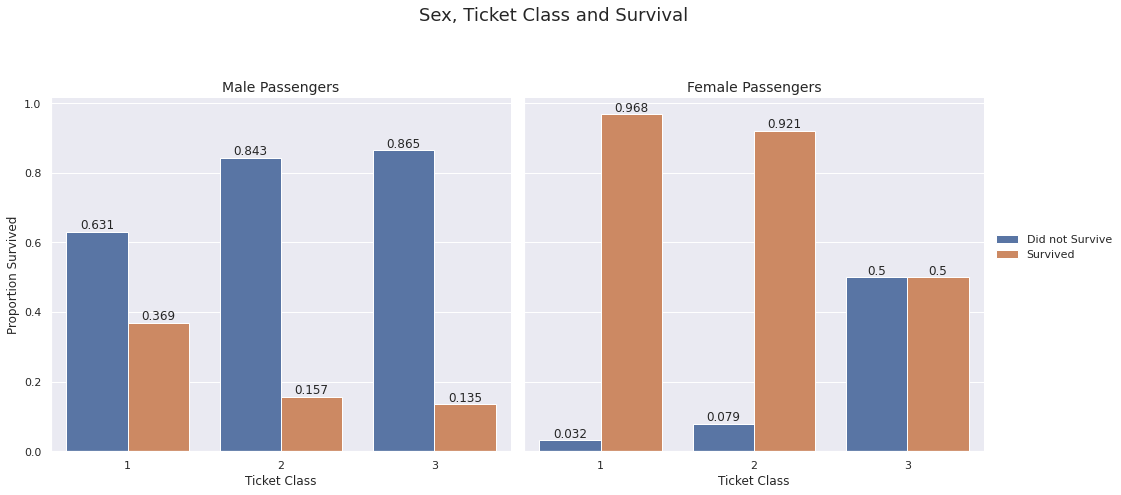

In [7]:
#Data wrangling
maleFirstClass = dt.groupby(['Survived','Sex',"Pclass"])\
                            .count()\
                            .reset_index()[['Survived','Pclass','Sex','PassengerId']].query("Sex=='male' & Pclass==1")
maleSecondClass = dt.groupby(['Survived','Sex',"Pclass"])\
                            .count()\
                            .reset_index()[['Survived','Pclass','Sex','PassengerId']].query("Sex=='male' & Pclass==2")
maleThirdClass = dt.groupby(['Survived','Sex',"Pclass"])\
                            .count()\
                            .reset_index()[['Survived','Pclass','Sex','PassengerId']].query("Sex=='male' & Pclass==3")

femaleFirstClass = dt.groupby(['Survived','Sex',"Pclass"])\
                            .count()\
                            .reset_index()[['Survived','Pclass','Sex','PassengerId']].query("Sex=='female' & Pclass==1")
femaleSecondClass = dt.groupby(['Survived','Sex',"Pclass"])\
                            .count()\
                            .reset_index()[['Survived','Pclass','Sex','PassengerId']].query("Sex=='female' & Pclass==2")
femaleThirdClass = dt.groupby(['Survived','Sex',"Pclass"])\
                            .count()\
                            .reset_index()[['Survived','Pclass','Sex','PassengerId']].query("Sex=='female' & Pclass==3")


maleFirstClass["Proportion Survived"] = maleFirstClass["PassengerId"].apply(lambda x: x/sum( maleFirstClass["PassengerId"]))

maleSecondClass["Proportion Survived"]= maleSecondClass["PassengerId"].apply(lambda x: x/sum( maleSecondClass["PassengerId"]))

maleThirdClass["Proportion Survived"]= maleThirdClass["PassengerId"].apply(lambda x: x/sum( maleThirdClass["PassengerId"]))

femaleFirstClass["Proportion Survived"]= femaleFirstClass["PassengerId"].apply(lambda x: x/sum( femaleFirstClass["PassengerId"]))

femaleSecondClass["Proportion Survived"]= femaleSecondClass["PassengerId"].apply(lambda x: x/sum( femaleSecondClass["PassengerId"]))

femaleThirdClass["Proportion Survived"]= femaleThirdClass["PassengerId"].apply(lambda x: x/sum( femaleThirdClass["PassengerId"]))


pd.concat([maleFirstClass,maleSecondClass,maleThirdClass,femaleFirstClass,femaleSecondClass,femaleThirdClass])

# Visualization

ax = sns.catplot(
    x='Pclass',
    y='Proportion Survived',
    hue='Survived',
    col= 'Sex',
    kind='bar',
    height=7,
    data=pd.concat([maleFirstClass,maleSecondClass,maleThirdClass,femaleFirstClass,femaleSecondClass,femaleThirdClass]),
    legend=False
)

# iterate through axes
for g in ax.axes.ravel():
    
    # add annotations
    for c in g.containers:
        labels = [f'{round(v.get_height(),3)}' for v in c]
        g.bar_label(c, labels=labels, label_type='edge')


ax.set(xlabel="Ticket Class")
ax1, ax2 = ax.axes[0]
ax1.set_title("Male Passengers",size=14)
ax2.set_title("Female Passengers",size=14)
ax.fig.subplots_adjust(top=0.8)
hue_labels = ['Did not Survive', 'Survived']
ax.add_legend(legend_data={
    key: value for key, value in zip(hue_labels, ax._legend_data.values())
})
ax.fig.suptitle("Sex, Ticket Class and Survival",size=18)
plt.show()

## 2. Passenger Sex, Age and Survival

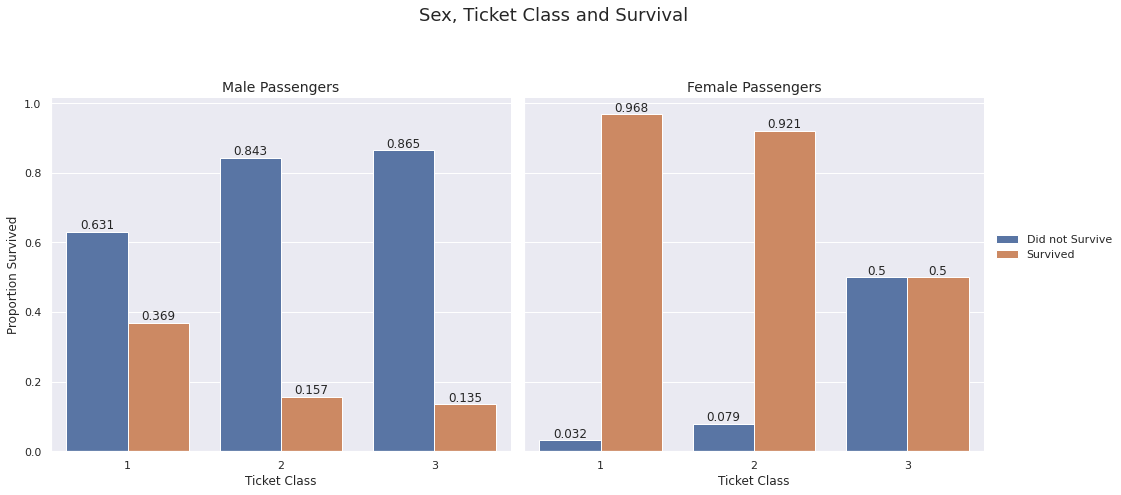

In [8]:
#Data wrangling
maleFirstClass = dt.groupby(['Survived','Sex',"Pclass"])\
                            .count()\
                            .reset_index()[['Survived','Pclass','Sex','PassengerId']].query("Sex=='male' & Pclass==1")
maleSecondClass = dt.groupby(['Survived','Sex',"Pclass"])\
                            .count()\
                            .reset_index()[['Survived','Pclass','Sex','PassengerId']].query("Sex=='male' & Pclass==2")
maleThirdClass = dt.groupby(['Survived','Sex',"Pclass"])\
                            .count()\
                            .reset_index()[['Survived','Pclass','Sex','PassengerId']].query("Sex=='male' & Pclass==3")

femaleFirstClass = dt.groupby(['Survived','Sex',"Pclass"])\
                            .count()\
                            .reset_index()[['Survived','Pclass','Sex','PassengerId']].query("Sex=='female' & Pclass==1")
femaleSecondClass = dt.groupby(['Survived','Sex',"Pclass"])\
                            .count()\
                            .reset_index()[['Survived','Pclass','Sex','PassengerId']].query("Sex=='female' & Pclass==2")
femaleThirdClass = dt.groupby(['Survived','Sex',"Pclass"])\
                            .count()\
                            .reset_index()[['Survived','Pclass','Sex','PassengerId']].query("Sex=='female' & Pclass==3")


maleFirstClass["Proportion Survived"] = maleFirstClass["PassengerId"].apply(lambda x: x/sum( maleFirstClass["PassengerId"]))

maleSecondClass["Proportion Survived"]= maleSecondClass["PassengerId"].apply(lambda x: x/sum( maleSecondClass["PassengerId"]))

maleThirdClass["Proportion Survived"]= maleThirdClass["PassengerId"].apply(lambda x: x/sum( maleThirdClass["PassengerId"]))

femaleFirstClass["Proportion Survived"]= femaleFirstClass["PassengerId"].apply(lambda x: x/sum( femaleFirstClass["PassengerId"]))

femaleSecondClass["Proportion Survived"]= femaleSecondClass["PassengerId"].apply(lambda x: x/sum( femaleSecondClass["PassengerId"]))

femaleThirdClass["Proportion Survived"]= femaleThirdClass["PassengerId"].apply(lambda x: x/sum( femaleThirdClass["PassengerId"]))


pd.concat([maleFirstClass,maleSecondClass,maleThirdClass,femaleFirstClass,femaleSecondClass,femaleThirdClass])

# Visualization

ax = sns.catplot(
    x='Pclass',
    y='Proportion Survived',
    hue='Survived',
    col= 'Sex',
    kind='bar',
    height=7,
    data=pd.concat([maleFirstClass,maleSecondClass,maleThirdClass,femaleFirstClass,femaleSecondClass,femaleThirdClass]),
    legend=False
)

# iterate through axes
for g in ax.axes.ravel():
    
    # add annotations
    for c in g.containers:
        labels = [f'{round(v.get_height(),3)}' for v in c]
        g.bar_label(c, labels=labels, label_type='edge')


ax.set(xlabel="Ticket Class")
ax1, ax2 = ax.axes[0]
ax1.set_title("Male Passengers",size=14)
ax2.set_title("Female Passengers",size=14)
ax.fig.subplots_adjust(top=0.8)
hue_labels = ['Did not Survive', 'Survived']
ax.add_legend(legend_data={
    key: value for key, value in zip(hue_labels, ax._legend_data.values())
})
ax.fig.suptitle("Sex, Ticket Class and Survival",size=18)
plt.show()